In [1]:
from data import get_data
from neural_network import NeuralNetwork
from randomforest.randomForestInterface import RandomForest
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.colors as mcolors


In [2]:
train_X, train_y, val_X, val_y, test_X, test_y = get_data()

In [3]:
models = [NeuralNetwork(), RandomForest()]
modelNames = ["Neural Network", "Random Forest"]
for model in models:
  model.train(train_X, train_y, val_X, val_y)


Finished training! Time elapsed: 149.38035917282104


In [4]:
predictions = []
outputs = []
confusion_matrices = []
accuracies = []
recalls = []
precisions = []
f1s = []
for model in models:
  output = model.predict(test_X)
  pred = np.argmax(output.data, axis=1)
  predictions.append(pred)
  accuracies.append(accuracy_score(test_y, pred))
  confusion_matrices.append(confusion_matrix(test_y, pred))
  precisions.append(precision_score(test_y, pred, average=None))
  recalls.append(recall_score(test_y, pred, average=None))
  f1s.append(f1_score(test_y, pred, average=None))
  outputs.append(output)


In [5]:
print("Accuracies:")
for i in range(len(models)):
  print(f"{modelNames[i]} has an accuracy of {accuracies[i]}")


Accuracies:
Neural Network has an accuracy of 0.8896713615023474
Random Forest has an accuracy of 0.8568075117370892


In [6]:
print("F1 Scores:")
for i in range(len(models)):
  print(f"{modelNames[i]} has an F1 score of {f1s[i]}.")


F1 Scores:
Neural Network has an F1 score of [0.9394387  0.68468468 0.71875   ].
Random Forest has an F1 score of [0.93623188 0.5        0.55172414].


In [7]:
print("Precisions:")
for i in range(len(models)):
  print(f"{modelNames[i]} has a precision score of {precisions[i]}.")


Precisions:
Neural Network has a precision score of [0.91907514 0.7037037  0.88461538].
Random Forest has a precision score of [0.89972145 0.55319149 0.8       ].


In [8]:
print("Recalls:")
for i in range(len(models)):
  print(f"{modelNames[i]} has a recall score of {recalls[i]}.")


Recalls:
Neural Network has a recall score of [0.96072508 0.66666667 0.60526316].
Random Forest has a recall score of [0.97583082 0.45614035 0.42105263].


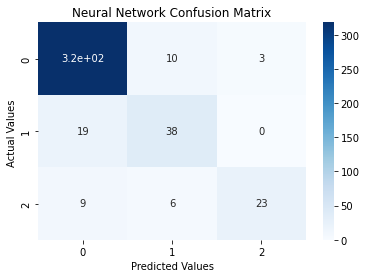

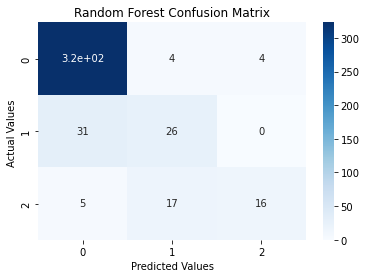

In [9]:
for i in range(len(models)):

  ax = sn.heatmap(confusion_matrices[i], annot=True, cmap='Blues')
  ax.set_title(f'{modelNames[i]} Confusion Matrix')
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ')
  ax.xaxis.set_ticklabels([0, 1, 2])
  ax.yaxis.set_ticklabels([0, 1, 2])
  plt.show()

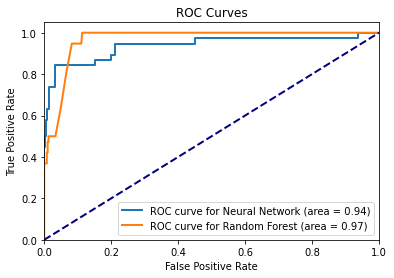

In [10]:
# Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
n_values = np.max(test_y) + 1
test_onehot = np.eye(n_values)[test_y]
plt.figure()
for idx, output in enumerate(outputs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_values):
        fpr[i], tpr[i], _ = roc_curve(test_onehot[:, i], output[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(
        test_onehot.ravel(), outputs[0].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    lw = 2
    plt.plot(
        fpr[2],
        tpr[2],
        color=list(mcolors.TABLEAU_COLORS.values())[idx],
        lw=lw,
        label=f"ROC curve for {modelNames[idx]} (area = {roc_auc[2]:0.2f})",
    )

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()